# Using the train dataset

Dataset Description:
    
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high.In this project,we will build a machine learning model where we will predict the doctor’s consulting fee and important details about a doctor.

In the data, we have the following columns to work with :

Qualification: Qualification and degrees held by the doctor
Experience: Experience of the doctor (number of years)
Rating: Rating given by patients
Profile: Type of the doctor
Miscellaeous_Info: Extra information about the doctor
Place: Area and the city where the doctor is located
Fees: Fees charged by the doctor(Target)

The target variable for this dataset is 'Fees'.  

In [49]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [50]:
#Loading the dataset
df=pd.read_excel('Final_Train.xlsx')

In [51]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [52]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [53]:
#Checking the shape of the dataset
df.shape

(5961, 7)

rows=5961

columns=7

In [54]:
#Checking the datatypes
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [55]:
#Checking the null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Null values are present in three columns('Rating','Place' and 'Miscellaneous_Info') 

EDA:

There will be lots of analysis which can be assumed by observing our data as all the feature we are having is categorical even experience, except target variable(Fees).

In [56]:
# Extract Experience Year from Experience column and convert to Numeric
df['Experience'] = df['Experience'].str.split().str[0]
df['Experience'] = df['Experience'].astype(int)

In [57]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [58]:
#Dividing the 'Place' column into locality and city
df.Place.fillna('Unknown,Unknown',inplace=True)
df['locality'] = df['Place'].str.split(",").str[0]
df['city'] = df['Place'].str.split(",").str[1]

#Now we can drop the place variable
df.drop('Place',axis=1,inplace=True)

In [59]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [60]:
#Checking the null values after removing 'Place' variable 
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
locality                 0
city                     1
dtype: int64

In [61]:
pd.set_option('display.max_rows',None)

In [62]:
#Removing the null values from 'City' column
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['city']=imp.fit_transform(df['city'].values.reshape(-1,1))

In [63]:
df['city'].value_counts()

 Bangalore             1259
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: city, dtype: int64

In [64]:
#Checking null values 
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
locality                 0
city                     0
dtype: int64

In [65]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [66]:
#Removing null values from 'Rating' column and convert the string type into integer
imp=SimpleImputer(strategy='most_frequent')
df['Rating']=imp.fit_transform(df['Rating'].values.reshape(-1,1))
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [67]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [68]:
#Checking null values after removing null values from 'Rating' column
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
locality                 0
city                     0
dtype: int64

Miscellaneous_Info & locality

Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating

locality and city are approximate have same relationship so better to move with only city,so drop the Miscellaneous_Info and locality

In [69]:
df.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [70]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bangalore
4,BAMS,20,100,Ayurveda,250,Chennai


In [71]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

Qualification

We are going to check which degrees the doctors have and then treat them as several features.

In [72]:
df['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

In [73]:
#Encoding the object columns
from sklearn.preprocessing import LabelEncoder
df['Qualification']=LabelEncoder().fit_transform(df['Qualification'])
df['Profile']=LabelEncoder().fit_transform(df['Profile'])
df['city']=LabelEncoder().fit_transform(df['city'])

In [74]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,city
0,401,24,100,5,100,4
1,73,12,98,0,350,0
2,1135,9,100,3,300,0
3,464,12,100,0,250,0
4,10,20,100,0,250,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007C8C943BE0>,
      dtype=object)

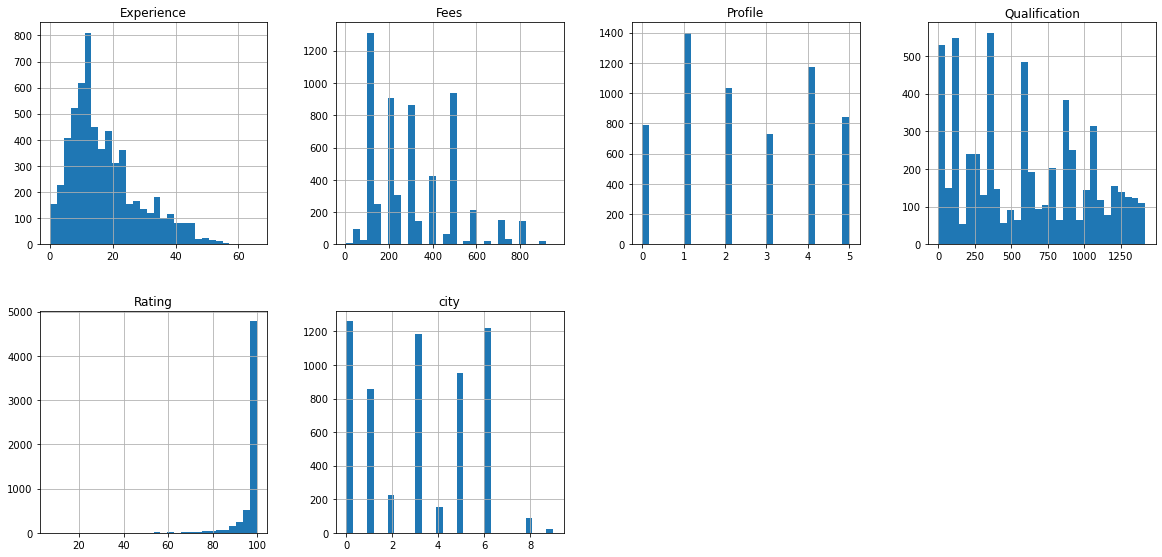

In [75]:
#Data Visualization
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

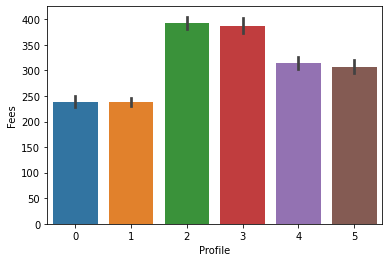

In [76]:
sns.barplot(x='Profile',y='Fees',data=df)

In [77]:
df['Profile'].value_counts()

1    1397
4    1173
2    1034
5     843
0     786
3     728
Name: Profile, dtype: int64

Dermatologist and ENT specialist are taking highest fees according to the barplot.

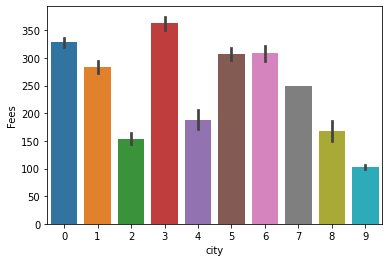

In [78]:
sns.barplot(x='city',y='Fees',data=df)

In [79]:
df['city'].value_counts()

0    1259
6    1219
3    1184
5     951
1     855
2     228
4     153
8      86
9      25
7       1
Name: city, dtype: int64

Doctors from Delhi is taking highest fees according to the barplot.

In [80]:
#Describe the dataset
df.describe()    #Statistical summary of the dataset

,Qualification,Experience,Rating,Profile,Fees,city
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,97.610636,2.441872,307.944640,3.097467
std,413.842446,11.142798,5.881539,1.658014,190.920373,2.350081
min,0.000000,0.000000,7.000000,0.000000,5.000000,0.000000
25%,219.000000,9.000000,98.000000,1.000000,150.000000,1.000000
50%,596.000000,14.000000,100.000000,2.000000,300.000000,3.000000
75%,943.000000,23.000000,100.000000,4.000000,500.000000,5.000000
max,1419.000000,66.000000,100.000000,5.000000,950.000000,9.000000


In [81]:
#Checking the correlation of the columns
df.corr()

,Qualification,Experience,Rating,Profile,Fees,city
Qualification,1.000000,0.134697,-0.163692,0.393123,0.263214,-0.030035
Experience,0.134697,1.000000,-0.149594,0.202073,0.002117,0.013503
Rating,-0.163692,-0.149594,1.000000,-0.047013,-0.154713,0.071622
Profile,0.393123,0.202073,-0.047013,1.000000,0.145226,-0.017342
Fees,0.263214,0.002117,-0.154713,0.145226,1.000000,-0.041694
city,-0.030035,0.013503,0.071622,-0.017342,-0.041694,1.000000


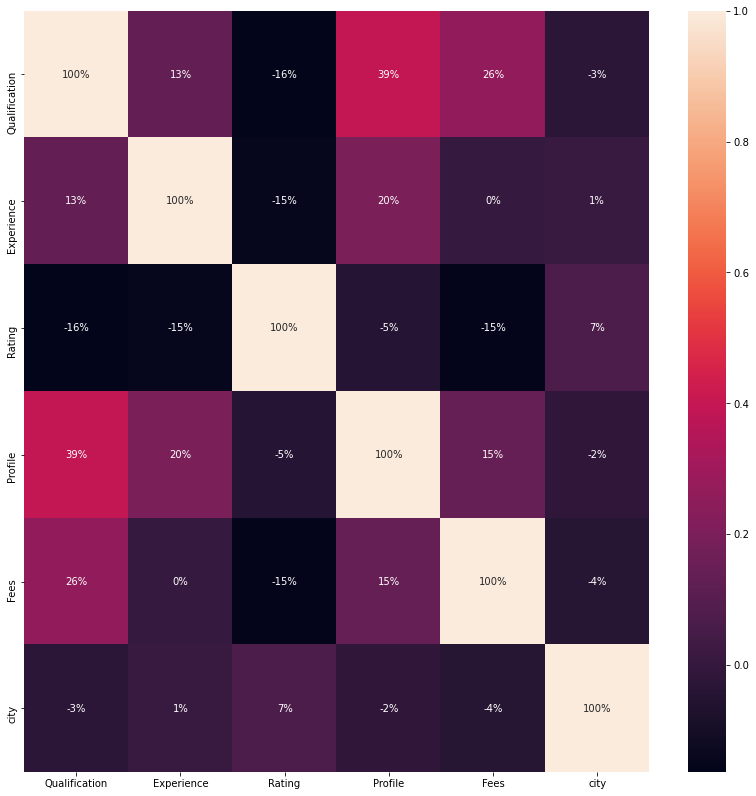

In [82]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [83]:
#Splitting the independent and target variable in x and y
x=df.drop('Fees',axis=1)
y=df['Fees']

In [84]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

Model Building:

In [89]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
model=[DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),SVC(),RandomForestClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.1951219512195122
accuracy score correspond to random state 40 is 0.23221544715447154
accuracy score correspond to random state 40 is 0.1448170731707317
accuracy score correspond to random state 40 is 0.24441056910569106
accuracy score correspond to random state 40 is 0.23119918699186992
accuracy score correspond to random state 41 is 0.195630081300813
accuracy score correspond to random state 41 is 0.22205284552845528
accuracy score correspond to random state 41 is 0.22611788617886178
accuracy score correspond to random state 41 is 0.26371951219512196
accuracy score correspond to random state 41 is 0.23373983739837398
accuracy score correspond to random state 42 is 0.20833333333333334
accuracy score correspond to random state 42 is 0.2306910569105691
accuracy score correspond to random state 42 is 0.22205284552845528
accuracy score correspond to random state 42 is 0.2621951219512195
accuracy score correspond to random state 42 is 0.2408

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

In [129]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=82,test_size=0.33)
sv=SVC()
sv.fit(train_x,train_y)
sv.score(train_x,train_y)
pred=sv.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.27235772357723576
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          50       0.00      0.00      0.00        20
          60       0.00      0.00      0.00         4
          70       0.00      0.00      0.00        10
          80       0.00      0.00      0.00         7
         100       0.31      0.66      0.42       437
         130       0.00      0.00      0.00         1
         150       0.00      0.00      0.00        85
         200       0.27      0.28      0.28       310
         220       0.00      0.00      0.00         1
         230       0.00      0.00      0.00         1
         250       0.00      0.00      0.00      

In [130]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(sv,x,y,cv=5)
print(scr.mean())

0.2596878041371085


The actual accuracy of the model is 26%.

Now we will do hyperparameter tuning of the model using GridSearchCV.

In [131]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
sv=SVC()
parameters={"kernel":['linear','rbf'],"C":[1,10]}
kf=KFold(n_splits=5)
gs=GridSearchCV(sv,parameters,cv=kf)
gs.fit(x,y)
print(gs.best_params_)
print(gs.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.2674038153209156


In [162]:
from sklearn.svm import SVR
sv=SVC(kernel='rbf',C=10)
sv.fit(train_x,train_y)

SVC(C=10)

Accuracy of the model is increased by 1% after GridSearchCV and the accuracy is 27%.

In [163]:
import pickle
filename='dr_consultation.pkl'
pickle.dump(sv,open(filename,'wb'))

# Using the test dataset

In [164]:
#Loading the test data
test_df=pd.read_excel('Final_Test.xlsx')

In [165]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [166]:
test_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [167]:
test_df.shape

(1987, 6)

In [168]:
#Checking the datatypes of the test dataset 
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [169]:
#Checking for null values
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Null values are present in three columns('Rating','Place' and 'Miscellaneous_Info')

EDA:

In [170]:
# Extract Experience Year from Experience column and convert to Numeric
test_df['Experience'] =test_df['Experience'].str.split().str[0]
test_df['Experience'] =test_df['Experience'].astype(int)

In [171]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [172]:
#Dividing the 'Place' column into locality and city
test_df.Place.fillna('Unknown,Unknown',inplace=True)
test_df['locality'] =test_df['Place'].str.split(",").str[0]
test_df['city'] =test_df['Place'].str.split(",").str[1]

#Now we can drop the place variable
test_df.drop('Place',axis=1,inplace=True)

In [173]:
test_df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,NaN,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,NaN,Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [174]:
#Checking the null values after removing 'Place' variable 
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Profile                  0
Miscellaneous_Info     834
locality                 0
city                     0
dtype: int64

In [175]:
test_df['city'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: city, dtype: int64

In [176]:
#Removing null values from 'Rating' column and convert the string type into integer
imp=SimpleImputer(strategy='most_frequent')
test_df['Rating']=imp.fit_transform(test_df['Rating'].values.reshape(-1,1))
test_df['Rating'] =test_df['Rating'].str.slice(stop=-1).astype(int)

In [177]:
test_df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,locality,city
0,MBBS,35,100,General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,100,Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore


In [178]:
test_df.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Profile                 0
Miscellaneous_Info    834
locality                0
city                    0
dtype: int64

Miscellaneous_Info & locality

Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating.locality and city are approximate have same relationship so better to move with only city,so dropping the Miscellaneous_Info and locality

In [179]:
test_df.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [180]:
test_df.head()

,Qualification,Experience,Rating,Profile,city
0,MBBS,35,100,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,Chennai
3,BAMS,0,100,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,Bangalore


In [181]:
test_df['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

Qualification

We are going to check which degrees the doctors have and then treat them as several features.

In [182]:
test_df['Qualification'].value_counts()[:30]

BAMS                                                     153
BHMS                                                     150
BDS                                                      144
MBBS                                                     107
MBBS, MD - Dermatology                                    64
MBBS, MS - ENT                                            60
MBBS, MD - Dermatology , Venereology & Leprosy            53
MBBS, MD - General Medicine                               50
MBBS, DDVL                                                31
MBBS, Diploma in Otorhinolaryngology (DLO)                30
BHMS, MD - Homeopathy                                     27
BAMS, MD - Ayurveda Medicine                              24
MBBS, MD - Medicine                                       21
BDS, MDS - Conservative Dentistry & Endodontics           21
BDS, MDS - Oral & Maxillofacial Surgery                   19
MBBS, MS - Otorhinolaryngology                            17
BDS, MDS - Prosthodontic

In [183]:
#Encoding the object columns
from sklearn.preprocessing import LabelEncoder
test_df['Qualification']=LabelEncoder().fit_transform(test_df['Qualification'])
test_df['Profile']=LabelEncoder().fit_transform(test_df['Profile'])
test_df['city']=LabelEncoder().fit_transform(test_df['city'])

In [184]:
test_df.head()

,Qualification,Experience,Rating,Profile,city
0,241,35,100,4,6
1,340,31,100,3,5
2,258,40,70,2,1
3,6,0,100,0,3
4,79,16,100,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007CA93502E0>,
      dtype=object)

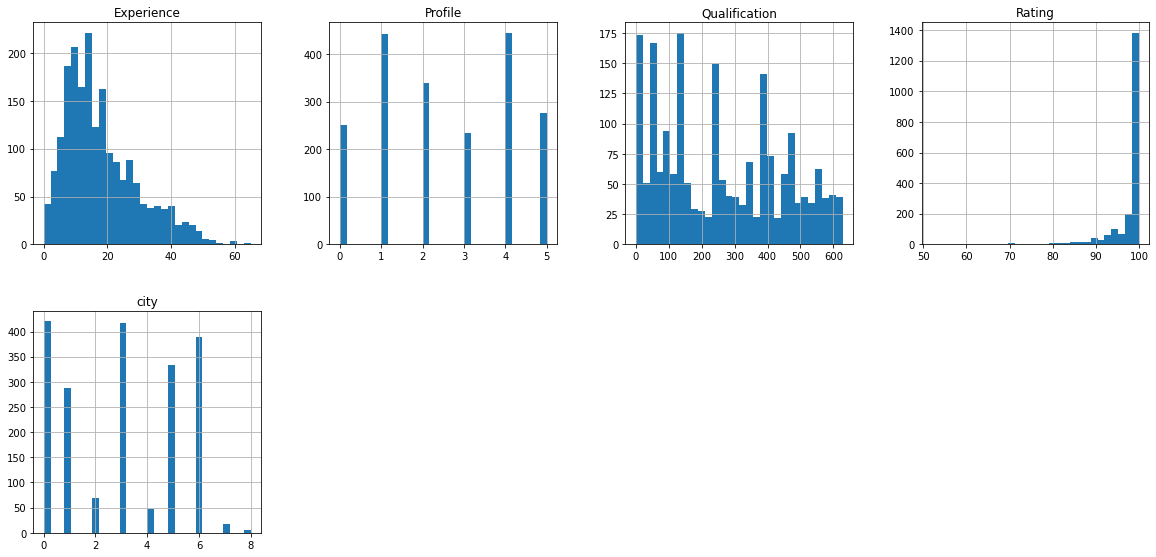

In [185]:
#Data Visualization
test_df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [186]:
#Describe the dataset
test_df.describe()    #Statistical summary of the dataset

,Qualification,Experience,Rating,Profile,city
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,17.874685,97.490689,2.508807,3.037745
std,185.961177,11.366764,5.793117,1.654223,2.277143
min,0.000000,0.000000,52.000000,0.000000,0.000000
25%,93.000000,9.000000,98.000000,1.000000,1.000000
50%,241.000000,15.000000,100.000000,2.000000,3.000000
75%,417.000000,24.000000,100.000000,4.000000,5.000000
max,629.000000,65.000000,100.000000,5.000000,8.000000


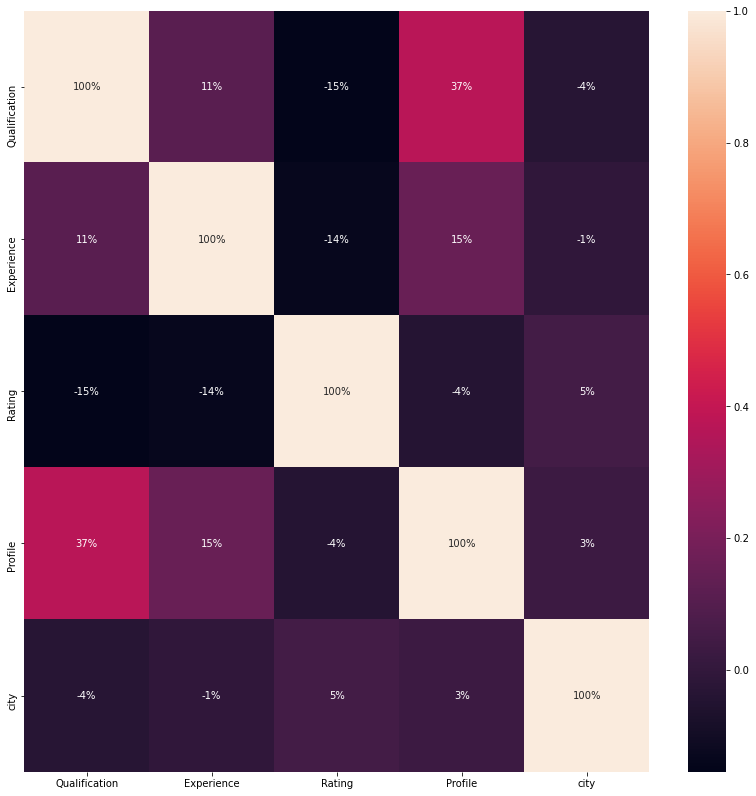

In [187]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(test_df.corr(), annot=True, fmt='.0%')

In [188]:
#Load the model
fitted_model=pickle.load(open("dr_consultation.pkl","rb"))

In [189]:
fitted_model

SVC(C=10)

In [190]:
#Prediction over test data
predictions=fitted_model.predict(test_df)

In [191]:
predictions

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)